<h1>This code classifies the number in a 25 x 25 pixel image</h1>

In [23]:
# Python version used 3.8.10


import os
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.callbacks import CSVLogger # CSV logger logs the value of the loss each epochs. This is useful if you want to save the values of loss in a .csv file
import pandas as pd # Pandas for reading and manipulating the data
import numpy as np # Numpy for handling matrices of data
from tensor_model_maker import DNN_model # This is a class that is personally customized to make it more easy to create a tensorflow DNN model
import matplotlib.pyplot as plt # Matplotlib for showing the data

In [24]:
# Loading the mnist dataset but this format of dataset will not be used because the data needs to be preprocessed
# The reason for putting this code in is because if you want to see the raw data without being preprocessed
# The preprocessing part will be done later
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

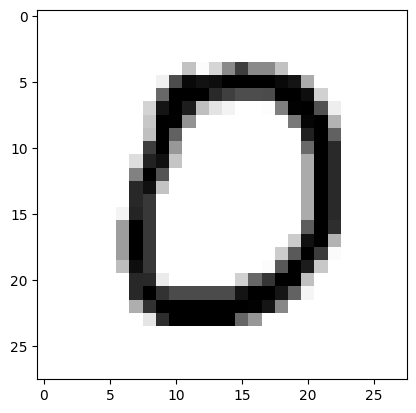

In [25]:
plt.figure()
plt.imshow(x_test[10], cmap=plt.cm.binary)
plt.show()

In [ ]:
# This is the preprocessing part of the data
# As you can see this part takes in the (28, 28) size of the data and convert it into (784, 1) size matrix
# Run this code if you still dont have the data saved in the computer


# Numpy arrays are turned into lists first and then appended on the list are the flattened values of the images
# After that the whole list is then reshaped into a numpy array
# This is a lot more faster at the cost of memory

# x_train_flattened = []
# for image in x_train:
#     flattened  = np.ndarray.ravel(image, order='C')
#     x_train_flattened.append(list(flattened))
# x_train_flattened = np.reshape(x_train_flattened, newshape=(np.shape(x_train)[0], np.shape(x_train)[1]**2))

# x_test_flattened = []
# for image in x_test:
#     flattened  = np.ndarray.ravel(image, order='C')
#     x_test_flattened.append(list(flattened))
# x_test_flattened = np.reshape(x_test_flattened, newshape=(np.shape(x_test)[0], np.shape(x_test)[1]**2))

# np.save("../datas/mnist_number_dataset/x_train_flattened.npy", x_train_flattened)
# np.save("../datas/mnist_number_dataset/y_train_flattened.npy", y_train)

# np.save("../datas/mnist_number_dataset/x_test_flattened.npy", x_test_flattened)
# np.save("../datas/mnist_number_dataset/y_test_flattened.npy", y_test)

In [ ]:
# Loading the preprocessed data
x_train_flattened = np.load("../datas/mnist_number_dataset/x_train_flattened.npy")
y_train_flattened = np.load("../datas/mnist_number_dataset/y_train_flattened.npy")
x_test_flattened = np.load("../datas/mnist_number_dataset/x_test_flattened.npy")
y_test_flattened = np.load("../datas/mnist_number_dataset/y_test_flattened.npy")

In [ ]:
# Creating the deep neural network model if you still have not created one
DNN_model.make_model(x_train_flattened, y_train_flattened, num_of_inputs=784, num_of_outputs=10, num_of_hidden_layers=5, epochs=50, batch_size=1000, save_freq=1500, num_of_neurons_of_hidden_layers=128)

In [ ]:
# Creating a class object for loading and training of the model
load_num_model = DNN_model()

In [ ]:
# Loading the newly created model or you can load another model that you pretrained
load_num_model.load_model("../trained_models\model1")

In [ ]:
# Training the loaded model
load_num_model.train_model(x_train_flattened, y_train_flattened, epochs=100, batch_size=100, save_freq=2000, save_param_excel=True, validation_data=(x_test_flattened, y_test_flattened))

In [ ]:
# Loading a specific epoch model for testing
model_test = tf.keras.models.load_model(r"../trained_models\model2\saved_per_train\train1\Epoch50_loss0.12")

In [ ]:
# Using that loaded specific epoch model and data are inputted for prediction
model_test.predict(x_test_flattened)[10]